# Homework 10 (Julia Problems)
## Math 314 Fall 2024

## Supplemental Problem **12.1** (modified)

### Part (a)

Create a $20 \times 10$ random matrix $A$ using the `rand` command and a random vector $b$ of length 20. (Recall `rand(m,n)` gives a matrix and `rand(n)` gives a vector.)

You will find the least squares solution of $Ax = b$ four ways:

* Using the built-in backslash operator in Julia.
* Solving the normal equation $(A^T A) x = A^T b$ by setting up the square matrix $A^T A$ and then using the backslash operator with it.
* Forming the pseudoinverse $A^\dagger = (A^TA)^{-1} A^T$, in which case $\hat x = A^\dagger b$. This will require forming a matrix inverse, which can be done with the `inv` command.

You should save each solution and then compute the RMS error between the three different solutions. (Recall that the RMS error between two vectors, say $a$ and $b$, is **the square root** of $\frac{\sum (a_i-b_i)^2}{n}$.)



In [ ]:
#Set up your A and b here.

In [7]:
# Solve here using backslash

In [2]:
# Solve by finding the normal equation and solving the new system using backslash.

In [3]:
# Solve here by finding the pseudoinverse and using it to solve.
# Recall that `inv(A)' will find the inverse of an invertible matrix A.

In [4]:
# Code here to compute and display the RMS error between the
# three different solutions here.  Note that the RMS error is almost the
# vector norm, but you need to divide by a vector length.

### Part (b)
Generate a random nonzero 10-vector $\delta$.  Let $\hat x$ be one of your solutions from the above.  Verify that $||A(\hat x + \delta)-b|| \ge 
||A\hat x -b||$.  This is a check that the residual $A\hat x - b$ is
smaller than that for $\hat x + \delta$.

In [8]:
# Find your delta and complete the question.

## Written Problem 3 Revisited

You set up (by hand) the normal equations correspoidng to finding the best parabola $p(t)$ to pass near the $(t,y)$ points $(0,0)$, $(1,8)$, $(3,8)$ and $(4,20)$.

Now use Julia to solve the normal equations, and then graph the parabola along with the data points.  The variable $t$ in your graph should run between $-0.2$ and $4.2$.

In [52]:
# Data

In [5]:
# Code here to compute coefficients of best fit.

In [6]:
# Code here to graph data and quadratic fit

## Problem 12.4 Revisted

We have the same data points $(t,y)$ as the above:
$(0,0)$, $(1,8)$, $(3,8)$ and $(4,20)$.  We want to
fit a quadratic to these points, but the point $(1,8)$ is less 
important than the other three points and the final point $(4,20)$ is
most important.  Using the notation
of problem 12.4, we will use a weight vector $w=(1, 0.3, 1, 2.5)$.

Using this weight vector, find the coefficients of the best fit quadratic
to the data points.  Plot the quadratic along with the data points.  You should find that, compared to your graph in the previous problem, your new graph is a lousy fit to the second point at the benefit of fitting the other three more closely, with a great fit of the final data point.



In [61]:
# Data

t = [0, 1, 3, 4];
y = [0, 8, 8, 20];
w = [1, 0.3, 1, 2.5];


In [9]:
# Code here to compute weighted best fit coefficients.

In [10]:
# Code here to generate graph of data and weighted best fit.

## Problem 13.3 (OPTIONAL)

Transistor data (number of transistors in a microprocessor per year of introduction):

In [11]:
n_count = [ 2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, 42000000, 220000000, 410000000];
t = [1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003];

Semi-log plot of transistors per year.

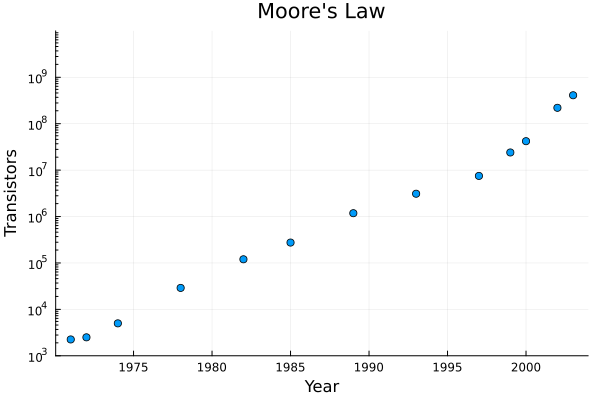

In [13]:
import Plots
Plots.scatter(t, n_count, yaxis=:log, ylim=(1e3,1e10), 
    yticks=10.0.^(3:9), yminorticks=10, legend=false,
  xlabel="Year", ylabel="Transistors", title="Moore's Law")

### Part (a)

Find the least squares fit of the data using the model
$\log_{10}(n_{count}) = \theta_1 + \theta_2(t-1970)$.
So you are finding the numbers $\theta_1$ and $\theta_2$ so that
the model best fits the data in the least squares sense.

Note that once you have solved for $\theta_1$ and $\theta_2$, your approximation for transistor count in year $t$ is then
$$
n_{count} = 10^{\theta_1} \cdot 10^{\theta_2(t-1970)}
$$


In [91]:
# Code here to compute parameters theta_1 and theta_2
b=log10.(n_count)
c2=t.-1970
c1=ones(13)
A=[c1';c2']'
S=A'*A
x=S\(A'b)

2-element Vector{Float64}:
 3.1255926338293465
 0.15401817984382254

Now plot the data along with your best fit in a semi-log graph.

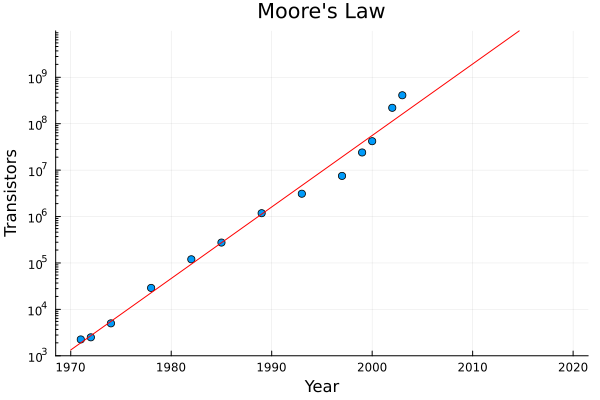

In [94]:
# Code here to generate graph of data and best fit exponential
Plots.scatter(t, n_count, yaxis=:log, ylim=(1e3,1e10), 
    yticks=10.0.^(3:9), yminorticks=10, legend=false,
  xlabel="Year", ylabel="Transistors", title="Moore's Law")
z=range(1970,2020,1000)
temp1=x[2]*(z.-1970)
w=(exp10.(x[1]))*(exp10.(temp1))
Plots.plot!(z,w, color=:red, linewidth=1)

### Part (b)

Use your model to predict the number of transistors in a CPU in 2015. 
For reference, an IBM Z13 from 2015 had $4\times 10^9$ transistors.

In [97]:
# Code here to compute predicted transistor count
predicted=exp10.(x[1])*(exp10(x[2]*(2015-1970))

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///Users/jillfaudree/Dropbox/julia_problems/In[97]#2:48\[90mIn[97]:2:48[0;0m]8;;\
# Code here to compute predicted transistor count
predicted=exp10.(x[1])*(exp10(x[2]*(2015-1970))[48;2;120;70;70m[0;0m
[90m#                                              └ ── [0;0m[91mExpected `)`[0;0m